In [11]:
# Authored by Gandhar
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics

sns.set()

def log_transform(df,col_name):
    df[col_name+'_Log'] = np.log(df[col_name])
    
    print("Skewness_orig: %f" % df[col_name].skew())
    print("Kurtosis_orig: %f" % df[col_name].kurt())
    print("Skewness_new: %f" % df[col_name+'_Log'].skew())
    print("Kurtosis_new: %f" % df[col_name+'_Log'].kurt())

    f, axes = plt.subplots(2, 1)
    f.tight_layout()
    sns.distplot(df[col_name], ax=axes[0])
    sns.distplot(df[col_name+'_Log'], ax=axes[1])
    
    plt.show()
    
def add_sqrt_transform(df,col_name,add):
    df[col_name+'_sqrt'] = np.sqrt(df[col_name]+add)
    
    print("Skewness_orig: %f" % df[col_name].skew())
    print("Kurtosis_orig: %f" % df[col_name].kurt())
    print("Skewness_new: %f" % df[col_name+'_sqrt'].skew())
    print("Kurtosis_new: %f" % df[col_name+'_sqrt'].kurt())

    f, axes = plt.subplots(2, 1)
    f.tight_layout()
    sns.distplot(df[col_name], ax=axes[0])
    sns.distplot(df[col_name+'_sqrt'], ax=axes[1])
    plt.show()
    
def print_missing_data(df,top=20):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data.head(top))
    
def get_corr_pairs(df):
    corrs = df.corr() >= 0.8
    names = list(corrs.index)
    corr_pairs={}
    for item in sorted(corrs):
        relevant=[ names[ind] for ind, row in enumerate(corrs[item]) if row and names[ind] != item ]
        if len(relevant)>0:
            corr_pairs[item] = relevant
    return corr_pairs
    
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def prediction_stats(y_test,y_pred):
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(y_test,y_pred))


In [12]:
df_train = pd.read_csv("/Users/gandharkamat/projects/8010/Final/train.csv")
df_test_data = pd.read_csv("/Users/gandharkamat/projects/8010/Final/test.csv")
sals_price=pd.read_csv("/Users/gandharkamat/projects/8010/Final/test_actual_price.csv")

df_test = pd.merge(df_test_data, sals_price,  how='inner', on='Id')

df_train['source']='train'
df_test['source']='test'
df = pd.concat([df_train,df_test], ignore_index = True, sort = False)

print(df_train.shape, df_test.shape, df.shape)


(1460, 82) (1459, 82) (2919, 82)


In [13]:
# Authored by Raamkumar
print_missing_data(df)

num_feats = ['YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'OverallQual', 'OverallCond', 'LotArea', 'LotFrontage', 'GarageArea', 'GarageCars', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
cat_feats = ['HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'GarageFinish', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition','GarageCond','GarageQual']

fillna_cat_cols = [
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinType2",
    "BsmtCond",
    "BsmtQual",
    "Fence",
    "FireplaceQu",
    'GarageQual', 
    'GarageCond',
    "GarageFinish",
    "GarageType",
    "MiscFeature",
    "PoolQC",
    'Alley'
]

for item in fillna_cat_cols:
    df[item].fillna('None',inplace=True)
    
fill0_num_columns=['GarageArea','GarageCars','GarageYrBlt']

for item in fill0_num_columns:
    df[df['GarageType']=='None'][item].fillna(0,inplace=True)

df[df['GarageYrBlt'] == 2207]['GarageYrBlt'] = df[df['GarageYrBlt'] == 2207]['YearBuilt']

df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
df['MSZoning'] = df.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

fillmean_num_cols = ["MasVnrArea",'GarageArea','GarageCars','BsmtFinSF1','TotalBsmtSF','BsmtFinSF2','BsmtUnfSF']

for item in fillmean_num_cols:
    df[item].fillna(df[item].mean(),inplace=True)

fill0_num_cols=['BsmtHalfBath','BsmtFullBath']

for item in fill0_num_cols:
    df[df['BsmtCond']=='None'][item].fillna(0,inplace=True)

fillmode_cat_cols = ['Electrical','MasVnrType','Exterior1st','Exterior2nd','GarageYrBlt','MSZoning','Utilities','SaleType','BsmtHalfBath','BsmtFullBath']

for item in fillmode_cat_cols:
    df[item].fillna(df[item].mode().iloc[0],inplace=True)

#from data dict
df['KitchenQual'] = df['KitchenQual'].fillna('TA')
df["Functional"] = df["Functional"].fillna("Typ")

print_missing_data(df)


              Total   Percent
PoolQC         2909  0.996574
MiscFeature    2814  0.964029
Alley          2721  0.932169
Fence          2348  0.804385
FireplaceQu    1420  0.486468
LotFrontage     486  0.166495
GarageFinish    159  0.054471
GarageYrBlt     159  0.054471
GarageQual      159  0.054471
GarageCond      159  0.054471
GarageType      157  0.053786
BsmtCond         82  0.028092
BsmtExposure     82  0.028092
BsmtQual         81  0.027749
BsmtFinType2     80  0.027407
BsmtFinType1     79  0.027064
MasVnrType       24  0.008222
MasVnrArea       23  0.007879
MSZoning          4  0.001370
BsmtFullBath      2  0.000685
              Total  Percent
source            0      0.0
YearRemodAdd      0      0.0
RoofMatl          0      0.0
Exterior1st       0      0.0
Exterior2nd       0      0.0
MasVnrType        0      0.0
MasVnrArea        0      0.0
ExterQual         0      0.0
ExterCond         0      0.0
Foundation        0      0.0
BsmtQual          0      0.0
BsmtCond          0   

/Users/gandharkamat/projects/venv/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [14]:
# Authored by Gandhar

df["SalePrice"] = np.log(df["SalePrice"])

from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from scipy.stats import skew

boxcox_transform = ['MasVnrArea','LotArea','LotFrontage','BsmtFinSF1','BsmtFinSF2',
                    'BsmtUnfSF','TotalBsmtSF','1stFlrSF','GrLivArea','WoodDeckSF',
                    'OpenPorchSF','EnclosedPorch','MiscVal','MoSold','LowQualFinSF',
                   '3SsnPorch']

for item in boxcox_transform:
    df[item] = boxcox1p(df[item], boxcox_normmax(df[item] + 1))
    
# i=34
# # print(num_feats[i])
# df1 = df[df['source']=='train']['KitchenAbvGr']
# df2 = boxcox1p(df1, boxcox_normmax(df1 + 1))
# plt.figure(figsize=(10, 10))
# f, axes = plt.subplots(1, 2)
# f.set_figheight(5)
# f.set_figwidth(10)
# sns.distplot(df['KitchenAbvGr'],ax=axes[0])
# sns.distplot(df2,ax=axes[1])
# plt.show()
# print("Skewness_orig: %f" % df1.skew())
# print("Kurtosis_orig: %f" % df1.kurt())
# print("Skewness_new: %f" % df2.skew())
# print("Kurtosis_new: %f" % df2.kurt())


GrLivArea


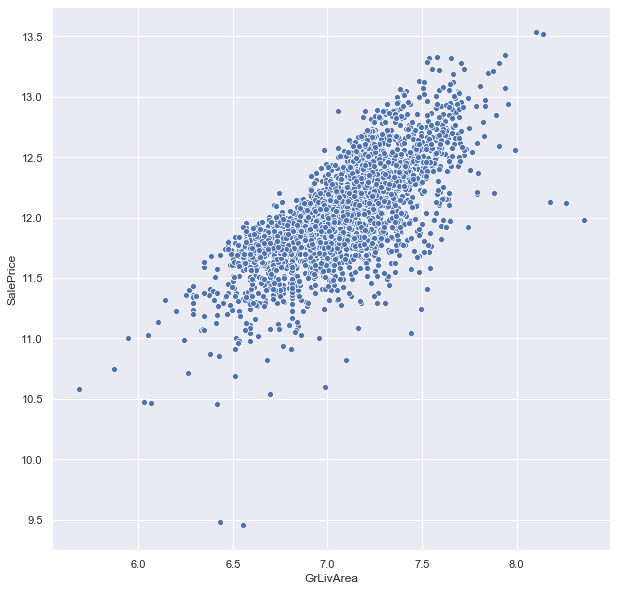

In [15]:
# Authored by Gandhar
# 
arr = ['GrLivArea','YearBuilt','YearRemodAdd','LotArea','LotFrontage','GarageArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','WoodDeckSF']

i=0
print(arr[i])
df1 = df[df['source']=='train'][arr[i]]
plt.figure(figsize=(10, 10))
sns.scatterplot(df[arr[i]],df['SalePrice'])
plt.show()


In [16]:
# Authored by Gandhar

df.drop(df[(df['source'] == 'train') & (df['LotFrontage']>30)].index,inplace=True) # good

# df.drop(df[(df['source'] == 'train') & (df['LotArea']>19)].index,inplace=True)
# df.drop(df[(df['source'] == 'train') & (df['BsmtFinSF1']>300)].index,inplace=True)
# df.drop(df[(df['source'] == 'train') & (df['TotalBsmtSF']>1000)].index,inplace=True)
# df.drop(df[(df['source'] == 'train') & (df['WoodDeckSF']>140)].index,inplace=True)
 

In [17]:
# Authored by Gandhar

# new feats
df['Remodel'] = df['YearRemodAdd'] - df['YearBuilt']
df['Remodel'] = df['Remodel'].apply(lambda x: 1 if x > 0 else 0 )
cat_feats.append('Remodel')

df['NewH'] = df['YrSold'] - df['YearBuilt']
df['NewH'] = df['NewH'].apply(lambda x: 1 if x == 0 else 0)
cat_feats.append('NewH')



# Authored by Supriya

# unused
# df['Total_porch_sf'] = (df['OpenPorchSF'] + df['3SsnPorch'] +
#                               df['EnclosedPorch'] + df['ScreenPorch'] +
#                               df['WoodDeckSF'])
# num_feats.append('Total_porch_sf')
# df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
# num_feats.append('TotalSF')
# df['HasBsmt'] = df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0 )
# df.loc[df['HasBsmt']==1,'TotalBsmtSF'] = np.log(df['TotalBsmtSF'])
# cat_feats.append('HasBsmt')
# col='SalePrice'
# log_transform(df,col)
# num_feats.remove(col)
# num_feats.append(col+'_Log')

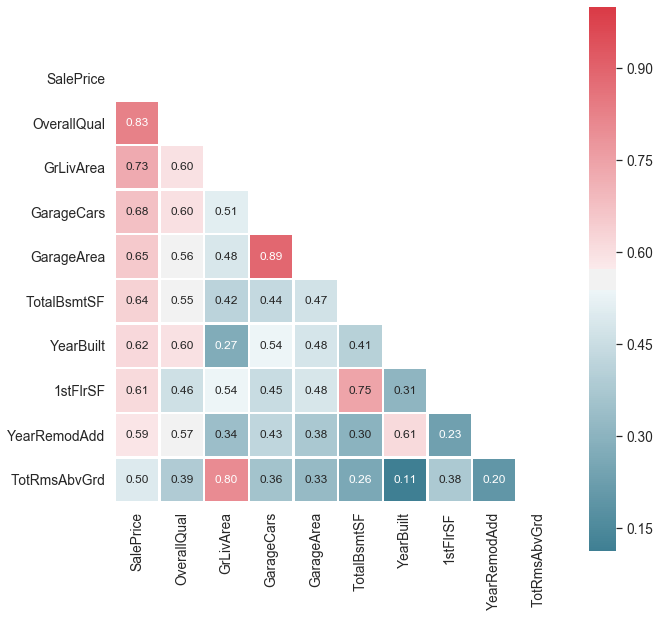

In [18]:
# Authored by Supriya

sns.set(style="white")

def plot_corr_matrix(df, nr_c, targ) :
    corr = df.corr()
    corr_abs = corr.abs()
    mask = np.zeros_like(corr_abs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    cols = corr_abs.nlargest(nr_c, targ)[targ].index
    cm = np.corrcoef(df[cols].values.T)

    plt.figure(figsize=(nr_c, nr_c))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.set(font_scale=1.25)
    with sns.axes_style("white"):
        sns.heatmap(cm, linewidths=1.5, annot=True, square=True, cmap=cmap,
                    fmt='.2f', annot_kws={'size': 12}, mask=mask,
                    yticklabels=cols.values, xticklabels=cols.values
                   )
    plt.show()
    
subset = ['TotRmsAbvGrd','1stFlrSF','GarageArea','SalePrice','GarageCars','TotalBsmtSF','OverallQual','GrLivArea','YearRemodAdd','YearBuilt']
plot_corr_matrix(df.loc[:,subset], len(subset), 'SalePrice')
# plot_corr_matrix(df,len(num_feats), 'SalePrice')


In [19]:
# Authored by Supriya

print(get_corr_pairs(df_train))


{'1stFlrSF': ['TotalBsmtSF'], 'GarageArea': ['GarageCars'], 'GarageCars': ['GarageArea'], 'GarageYrBlt': ['YearBuilt'], 'GrLivArea': ['TotRmsAbvGrd'], 'TotRmsAbvGrd': ['GrLivArea'], 'TotalBsmtSF': ['1stFlrSF'], 'YearBuilt': ['GarageYrBlt']}


In [20]:
# Authored by Supriya
from sklearn.preprocessing import StandardScaler

target = 'SalePrice'

#scale
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[list(set(num_feats) - set([target]))]), index=df[list(set(num_feats) - set([target]))].index, columns=df[list(set(num_feats) - set([target]))].columns)
df_scaled

#dummies
df_dummies = pd.concat([df.loc[:,target],df.loc[:,'source'],df_scaled,pd.get_dummies(df.loc[:,cat_feats])],axis=1)

#prep for models 
train = df_dummies.loc[df_dummies['source']=="train"]
test = df_dummies.loc[df_dummies['source']=="test"]

train.drop(['source'],axis=1,inplace=True)
test.drop(['source'],axis=1,inplace=True)

X = train.drop(target,axis=1)
y = train[target]

X_test = test.drop(target,axis=1)
y_test = test[target]

X.drop('MSZoning_C (all)',axis=1,inplace=True)
X_test.drop('MSZoning_C (all)',axis=1,inplace=True)

print(X.shape,y.shape,X_test.shape,y_test.shape)
output_all = pd.DataFrame()
output_all['actual'] = np.exp(y_test)

(1458, 302) (1458,) (1459, 302) (1459,)


/Users/gandharkamat/projects/venv/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

fit = False


In [28]:
# Authored by Bruce

lasso = Lasso()
parameters = {'alpha': [1e-5,1e-4,2e-4,4e-4,8e-4,1e-3,1e-2,1e-1],
             'fit_intercept':[True,False],
             'normalize': [True,False]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_log_error', cv=3,n_jobs=-1,verbose=2)

if fit:
    lasso_regressor.fit(X,y)

    print(lasso_regressor.best_params_)
    y_pred = lasso_regressor.predict(X_test)

    prediction_stats(np.exp(y_test),np.exp(y_pred))
    output_all['lasso'] = np.exp(y_pred)
    

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.2s


{'alpha': 0.0001, 'fit_intercept': True, 'normalize': True}
Mean Absolute Error: 13379.172632317408
Mean Squared Error: 736198441.7619343
Root Mean Squared Error: 27132.97701620547
Mean Absolute Percentage Error: 8.13852154234917


[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   10.6s finished


In [111]:
# Authored by Raamkumar

ridge = Ridge()
parameters = {'alpha': np.arange(1,100,0.5),
             'fit_intercept':[True,False],
             'normalize': [True,False]
             }

ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_log_error', cv=3,n_jobs=-1,verbose=2)
if fit:
    ridge_regressor.fit(X,y)

    print(ridge_regressor.best_params_)
    y_pred = ridge_regressor.predict(X_test)

    prediction_stats(np.exp(y_test),np.exp(y_pred))
    output_all['ridge'] = np.exp(y_pred)


Fitting 3 folds for each of 792 candidates, totalling 2376 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 1220 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 2349 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 2376 out of 2376 | elapsed:   14.5s finished


{'alpha': 30.0, 'fit_intercept': True, 'normalize': False}
Mean Absolute Error: 13449.569117956691
Mean Squared Error: 643642973.7173394
Root Mean Squared Error: 25370.11970246375
Mean Absolute Percentage Error: 8.18270237000597


In [112]:
# Authored by Bruce

param_grid = {"max_depth": range(2,10,2),
              'min_samples_split': np.arange(20,40,1),
            "max_features": [1, 3, 10, 50, 100, 'sqrt', 'auto','log2']}

regressor_dtree = DecisionTreeRegressor()
dtree=GridSearchCV(regressor_dtree,param_grid,cv=3,n_jobs=-1,verbose=2)

if fit:
    dtree.fit(X,y)
    print(dtree.best_estimator_)

    y_pred = dtree.predict(X_test)

    prediction_stats(np.exp(y_test),np.exp(y_pred))
    output_all['dtree'] = np.exp(y_pred)

Fitting 3 folds for each of 640 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:    5.3s


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=28,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
Mean Absolute Error: 22208.719011916455
Mean Squared Error: 1139464123.339991
Root Mean Squared Error: 33755.94945102257
Mean Absolute Percentage Error: 13.401257273000528


[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:   11.4s finished


In [113]:
# Authored by Raamumar

rfp = RandomForestRegressor()

param_grid = {
            "max_depth": np.arange(13,17,2),
            "n_estimators": [1500],
            "max_features": ['auto'],
            "bootstrap": [True]
            }

rf = GridSearchCV(rfp, param_grid=param_grid,cv=3,n_jobs=-1,verbose=2)
if fit:
    rf.fit(X, y)
    print(rf.best_estimator_)

    y_pred = rf.predict(X_test)
    output_all['rf'] = np.exp(y_pred)

    prediction_stats(np.exp(y_test),np.exp(y_pred))


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:   50.4s remaining:   50.4s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   51.7s finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=13, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Mean Absolute Error: 15890.871264248852
Mean Squared Error: 631581080.9421349
Root Mean Squared Error: 25131.27694611109
Mean Absolute Percentage Error: 9.688087888095083


In [23]:
# Authored by Gandhar
fit=True
param_grid = {
    "max_depth": range(3,5,1),
    "n_estimators": range(330,360,5),
    'objective':['reg:squarederror']
    }

model_xgb = xgb.XGBRegressor()

xgbr=GridSearchCV(model_xgb,param_grid,cv=3,n_jobs=-1,verbose=2)

if fit:
    xgbr.fit(X,y)
    print(xgbr.best_estimator_)
    
    y_pred = xgbr.predict(X_test)

    prediction_stats(np.exp(y_test),np.exp(y_pred))
    output_all['xgb'] = np.exp(y_pred)


Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  1.4min finished
/Users/gandharkamat/projects/venv/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/gandharkamat/projects/venv/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=335,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)
Mean Absolute Error: 13561.80202353924
Mean Squared Error: 444614277.2080441
Root Mean Squared Error: 21085.87862072729
Mean Absolute Percentage Error: 8.260564232081954


In [115]:
# Authored by Supriya
svr = SVR()

param_grid = {
    "C": range(20,50,5),
    "epsilon": np.arange(0.0008,0.001,0.0001),
    'gamma':[0.00008,0.00009,0.0001,0.0002,0.0003,0.0004]
    }

svrr=GridSearchCV(svr,param_grid,cv=3,n_jobs=-1,verbose=2)

if fit:
    svrr.fit(X,y)

    y_pred = svrr.predict(X_test)
    
    print(svrr.best_estimator_)
    
    prediction_stats(np.exp(y_test),np.exp(y_pred))
    output_all['svrr'] = np.exp(y_pred)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   36.8s finished


SVR(C=45, cache_size=200, coef0=0.0, degree=3, epsilon=0.0009000000000000001,
    gamma=8e-05, kernel='rbf', max_iter=-1, shrinking=True, tol=0.001,
    verbose=False)
Mean Absolute Error: 13495.704080688476
Mean Squared Error: 915272128.031242
Root Mean Squared Error: 30253.46472771742
Mean Absolute Percentage Error: 8.43625484385042


In [116]:
# Authored by Supriya

gbr = GradientBoostingRegressor()

param_grid = {
    "n_estimators": [2000],
    "max_depth": [3],
    'learning_rate':np.arange(0.03,0.05,0.01)
    }

gbrr=GridSearchCV(gbr,param_grid,cv=3,n_jobs=-1,verbose=2)

if fit:
    gbrr.fit(X,y)
    y_pred = gbrr.predict(X_test)
    prediction_stats(np.exp(y_test),np.exp(y_pred))
    output_all['gbrr'] = np.exp(y_pred)
    print(gbrr.best_estimator_)


Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:   31.2s remaining:   39.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   45.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   45.7s finished


Mean Absolute Error: 13808.166602045241
Mean Squared Error: 500508395.19683075
Root Mean Squared Error: 22372.04494892746
Mean Absolute Percentage Error: 8.256974319992324
GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.03, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=2000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [123]:
# Authored by Keerthi

vreg = VotingRegressor([('lasso', lasso_regressor), ('ridge', ridge_regressor),('svrr', svrr),('gbrr',gbrr),('xgb',xgbr)])
vreg.fit(X, y)

y_pred = vreg.predict(X_test)

output_all['voting'] = np.exp(y_pred)
prediction_stats(np.exp(y_test),np.exp(y_pred))


Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    5.2s finished


Fitting 3 folds for each of 792 candidates, totalling 2376 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 2289 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 2376 out of 2376 | elapsed:   14.8s finished


Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   36.7s finished


Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:   31.2s remaining:   38.9s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   45.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   45.8s finished


Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   53.3s finished


Mean Absolute Error: 12526.027892734135
Mean Squared Error: 462552664.5476197
Root Mean Squared Error: 21507.037558613683
Mean Absolute Percentage Error: 7.66381272120101


In [27]:
# Authored by Gandhar

# from sklearn.metrics import r2_score

# print ("Accuracy train : %.4g" % metrics.r2_score(y, y_pred_train))
# print ("Accuracy test : %.4g" % metrics.r2_score(y_test, y_pred_test))


xgb_coeffs = pd.DataFrame({ 'coeffs': xgbr.best_estimator_.feature_importances_,
             'cols': X.columns})
xgb_coeffs.sort_values(by='coeffs',ascending=False)

# xgb_coeffs = pd.DataFrame({ 'coeffs': xgbr.best_estimator_.feature_importances_,
#              'cols': X.columns})
# xgb_coeffs.sort_values(by='coeffs',ascending=False)

,coeffs,cols
23,0.168510,GarageCars
109,0.066295,BsmtQual_Ex
19,0.058296,Fireplaces
215,0.054992,GarageType_Attchd
30,0.038474,OverallQual
...,...,...
276,0.000274,SaleType_CWD
140,0.000267,LotConfig_FR2
90,0.000266,MasVnrType_BrkCmn
263,0.000235,PoolQC_Gd


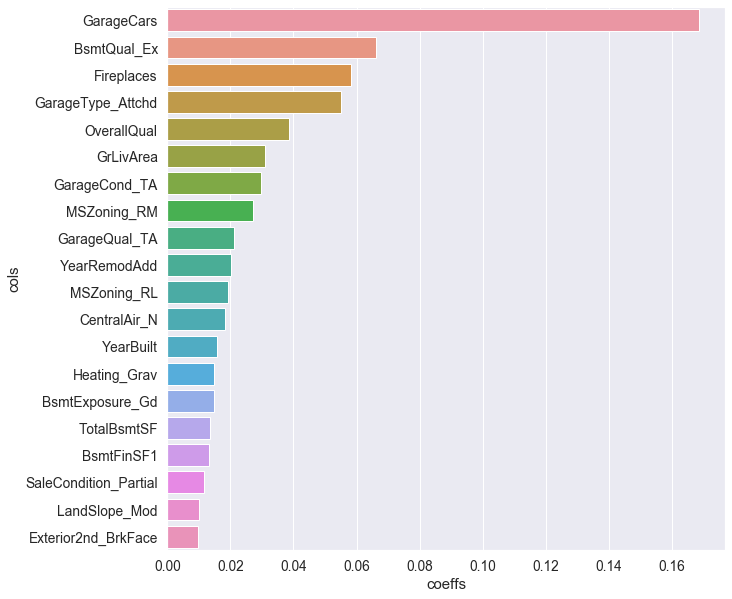

In [35]:
# Authored by Bruce

plt.figure(figsize=(10, 10))
# f, axes = plt.subplots(1, 2)
# f.set_figheight(5)
# f.set_figwidth(10)
# sns.distplot(df['KitchenAbvGr'],ax=axes[0])
# sns.distplot(df2,ax=axes[1])
# plt.show()

lasso_coeffs = pd.DataFrame({ 'coeffs': lasso_regressor.best_estimator_.coef_,
             'cols': X.columns})
sorted_df = xgb_coeffs.sort_values(by='coeffs',ascending=False).head(20)
sns.barplot(y=sorted_df['cols'],x=sorted_df['coeffs'])


# ridge_coeffs = pd.DataFrame({ 'coeffs': ridge_regressor.best_estimator_.coef_,
#              'cols': X.columns})

# ridge_coeffs[ridge_coeffs['coeffs']==0].cols.to_list()

# ridge_coeffs[ridge_coeffs['coeffs']==0].cols.to_list()